# Visualize House Sales Data

Let's use pandas and matplotlib to help us to visualize sales data.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.float_format = '{:,.2f}'.format

## Read and Display data

In [2]:
import os
import urllib.request

data_location = "../data/house-prices/house-sales-simplified.csv"
data_url =  'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-simplified.csv'
if not os.path.exists (data_location):
    data_location = 'house-sales-simplified.csv'
    if not os.path.exists(data_location):
        urllib.request.urlretrieve(data_url, data_location)
        print ('Downloading : ', data_url)
print('data_location :', data_location)  

data_location : house-sales-simplified.csv


In [3]:
house_prices = pd.read_csv(data_location)
house_prices

,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
0,1,9/16/14,280000,1000102,Multiplex,6,3.00,2400,9373,1991,98002
1,2,6/16/06,1000000,1200013,Single Family,4,3.75,3764,20156,2005,98166
2,3,1/29/07,745000,1200019,Single Family,4,1.75,2060,26036,1947,98166
3,4,2/25/08,425000,2800016,Single Family,5,3.75,3200,8618,1966,98168
4,5,3/29/13,240000,2800024,Single Family,4,1.75,1720,8620,1948,98168
...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,2,1.75,1410,1161,2011,-1
27059,27060,12/7/12,374000,9895000040,Townhouse,2,1.75,1410,1005,2011,-1
27060,27061,7/9/12,165000,9899200010,Single Family,4,1.00,1070,11170,1971,98055
27061,27062,5/26/06,315000,9900000355,Single Family,3,2.00,1345,6223,1939,98166


## 'Summary' of data

In [4]:
## TODO : use describe to get an idea of the data
## Hint : 'describe' 
house_prices.describe()

,ID,SalePrice,PropertyID,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
count,"27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00","27,063.00"
mean,"13,532.00","511,626.20","4,680,324,882.08",3.38,2.26,"2,122.96","10,997.68","1,977.09","82,223.04"
std,"7,812.56","342,821.17","2,896,350,979.15",0.90,0.77,939.84,"28,110.66",30.92,"36,106.67"
min,1.00,"3,000.00","1,000,102.00",0.00,0.00,370.00,494.00,"1,900.00",-1.00
25%,"6,766.50","329,000.00","2,213,000,057.50",3.00,1.75,"1,440.00","4,257.50","1,954.00","98,019.00"
50%,"13,532.00","425,000.00","3,972,900,140.00",3.00,2.50,"1,940.00","6,636.00","1,986.00","98,053.00"
75%,"20,297.50","590,000.00","7,504,001,385.00",4.00,2.50,"2,610.00","9,450.00","2,006.00","98,115.00"
max,"27,063.00","11,000,000.00","9,906,000,035.00",33.00,8.00,"10,740.00","1,024,068.00","2,016.00","98,354.00"


## Pair Plot

Try this plot.

Can you make sense of it? :-) 

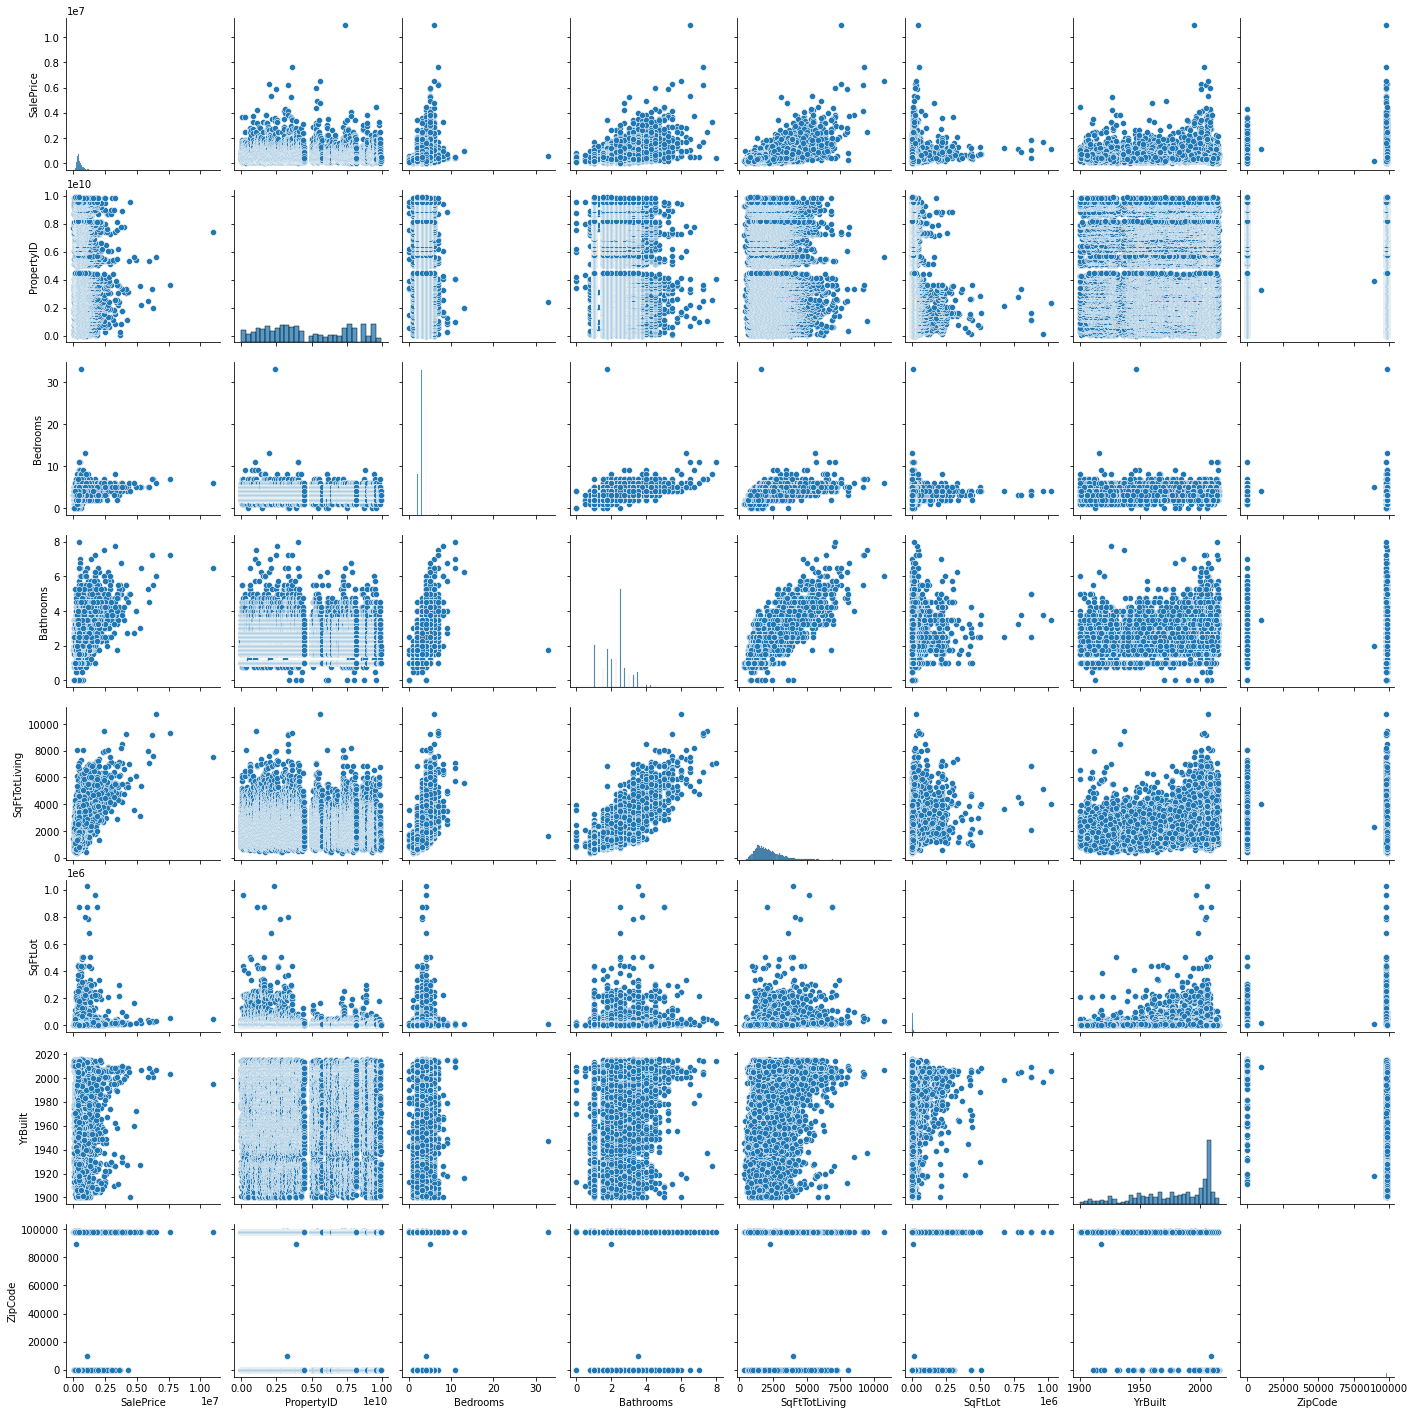

In [15]:
sns.pairplot(house_prices.drop(['ID', 'PropertyType'], axis=1))
plt.show()

## Histogram / Frequency Plot
Create a frequency table & histogram plot based on number of bedrooms

In [6]:
## calculate a frequency count
## Hint : group by 'Bedrooms'
freq_count = house_prices.groupby("Bedrooms").size()
freq_count

Bedrooms
0        12
1       164
2      3415
3     12074
4      9190
5      1872
6       275
7        41
8        10
9         5
11        3
13        1
33        1
dtype: int64

<AxesSubplot:xlabel='Bedrooms', ylabel='count'>

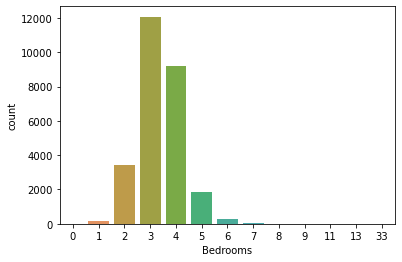

In [7]:
## TODO : countplot
## Hint : data=house_prices,   x='Bedrooms'

sns.countplot(data=house_prices, x="Bedrooms")

## Create a BoxPlot on sale prices 
Sale prices per property type  (Single Family, Townhouse)

<AxesSubplot:xlabel='PropertyType', ylabel='SalePrice'>

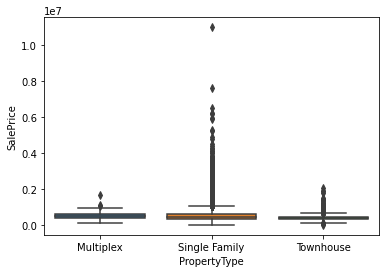

In [8]:
## TODO : data=price_by_property_type
## Hint : data=house_prices. X='PropertyType', y='SalePrice'
sns.boxplot(x="PropertyType", y="SalePrice",  data=house_prices)

## Bonus Lab : Improving our plot
Our plot data is pretty 'squished'  Let's see if we can improve it.  
Some of the outliers (like the 33 bedroom house is messing up the display).  
Let's remove the outliers.

In [9]:
## We are going to remove 10% off the data from the bottom and top

## first calculate 10%  and 90% prices
## Hint : supply the right parameters for quantile (10% --> 0.1,  90% --> 0.9)
ten_ninety = house_prices.SalePrice.quantile([.1, .9])

## extract 10% and 90% into variables
ten_percent_price = int(house_prices.SalePrice.quantile(.1))
ninety_percent_price = int(house_prices.SalePrice.quantile(.9))
print("10% price=", ten_percent_price,  ", 90% price=", ninety_percent_price)

10% price= 260000 , 90% price= 820000


In [10]:
## filter out below 10% and above 90%
print("total sales ", len(house_prices.index))

## filter prices above 10%  (hint : ten_percent_price)
above_ten = house_prices[house_prices["SalePrice"] >= ten_percent_price]
print("above 10% " , len(above_ten.index))

## filter prices below 90%  (hint : <= ninety_percent_price)
below_ninety  = house_prices.filter(house_prices["SalePrice"] <= ninety_percent_price)
print("below 90% ", len(below_ninety.index))
## filter above 10% and below 90% in one query
above_ten_below_ninety = house_prices.loc[(house_prices['SalePrice'] >= ten_percent_price) & (house_prices['SalePrice'] <=  ninety_percent_price)]
print("between 10% and 90% = {:,}".format(above_ten_below_ninety.shape[0]))

total sales  27063
above 10%  24411
below 90%  27063
between 10% and 90% = 21,716


<AxesSubplot:xlabel='PropertyType', ylabel='SalePrice'>

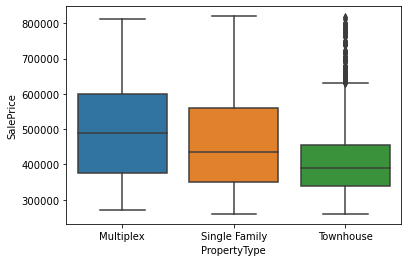

In [11]:
## TODO: do the same plot again
## Hint : data=above_ten_below_ninety
sns.boxplot(x="PropertyType", y="SalePrice",  data=above_ten_below_ninety)

## Any other plots?
Look at [MatplotLib Examples](https://matplotlib.org/gallery.html).
If any of them inspire you try to create a graph like that!
And do show it off to the class  :-)